In [1]:
import numpy as np
from performance.parameters import mean_true_time, read_timing_pars
from performance.performance_plots import charge_resolution, time_resolution

from ctapipe.io import EventSource
from ctapipe.calib import CameraCalibrator

In [2]:
directory = "/home/nieves/HESS"  
simtel_url = directory + "/gamma_67deg_0deg_run251___phase2d3_desert-x0.5-nsbreal-impsamp-UD1-eslope-1.8.simhess.zst"



In [3]:
true_image = []
image = []
peak_time = []
true_time = []


with EventSource(simtel_url) as source:

    subarray = source.subarray
    calibrator = CameraCalibrator(source.subarray, image_extractor_type = "FlashCamExtractor")

    for event in source:
        calibrator(event)
        for tel_id in subarray.get_tel_ids_for_type('LST_H.E.S.S. CT5 (876 mirrors)_FlashCam'): 
            
            true_pe = event.simulation.tel[tel_id].true_image            
            
            if true_pe is None:
                continue

            waveforms = event.r1.tel[tel_id].waveform
            broken_pixels = event.mon.tel[tel_id].pixel_status.hardware_failing_pixels[0]
            dl1 = event.dl1.tel[tel_id]
            true_t, true_std = mean_true_time(source, tel_id)

            true_image.append(true_pe)
            image.append(dl1.image)
            peak_time.append(dl1.peak_time)
            true_time.append(true_t)
            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


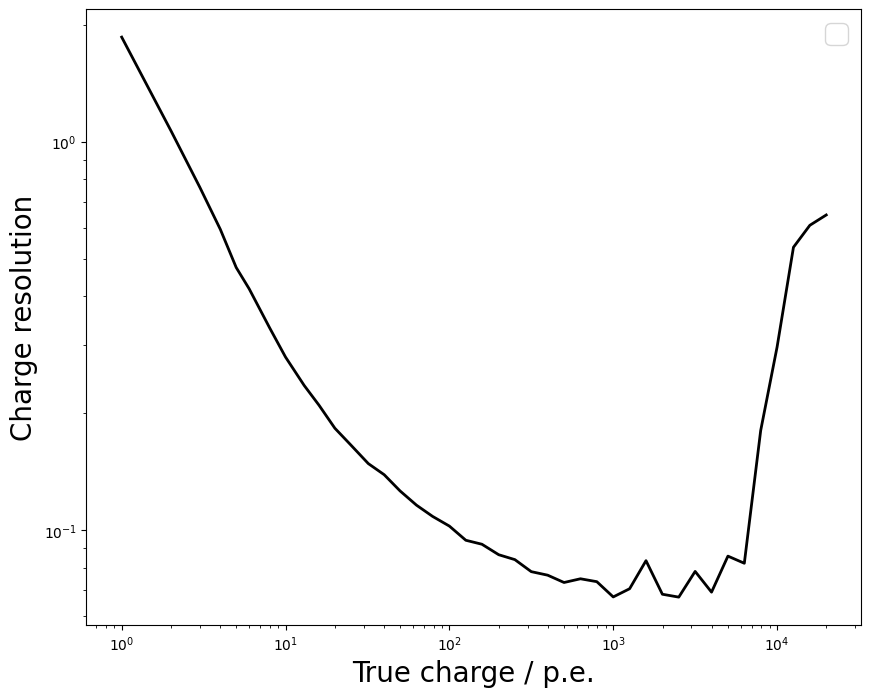

In [4]:
charge_resolution(0, 5, 50, np.array(true_image)[np.array(true_image)>0], np.array(image)[np.array(true_image)>0], requirements=False)

